#  Lab 0: Hello Quantum World!

## Lab 0 overview <a id="overview"></a>

The main goal of this introductory notebook is to help onboard New Quantum Learners to transition into utilizing scalable IBM Quantum devices for research.

This lab introduces you to Qiskit, IBM's software tool for designing and running quantum circuits on both simulators and real quantum hardware.
You will begin by installing Qiskit and setting up your IBM Cloud account, enabling access to IBM's quantum computers. Next, the lab guides you through building a GHZ state using Qiskit's Patterns, highlighting the importance of circuit optimization in quantum computing. Finally, you will execute your quantum program on a real quantum device.

# Table of Contents

* [Lab 0 overview](#overview)
* [Install Qiskit](#install)
    - [Troubleshooting](#troubleshooting)
    - [Imports](#imports)
* [Set up your IBM Cloud account ](#setting-ibm-cloud)

* [Generate a three-qubit GHZ state using Qiskit patterns](#ghz) 
    - [Step 1. Map](#map)
    - [Step 2. Optimize](#optimize)
    - [Step 3. Execute](#execute)
    - [Step 4. Post-process](#post-process)
    - [Running GHZ on hardware](#bonus)
* [Congratulations!](#congratulations)


# Install Qiskit <a id="install"></a>

Quantum computers stand as a technology that promises to disrupt how some calculations are done - from breaking encryption with Shor's algorithm, to enabling faster searches with Grover's algorithm, to designing better batteries with quantum phase estimation. A first step is choosing a software tool for designing and executing such algorithms. Here we will use Qiskit for the design and implementation of quantum circuits in simulators and real hardware. The following will help you install Qiskit v2.0.

If you would prefer to follow a video guide on how to install and run Qiskit locally, watch [this video](https://www.youtube.com/watch?v=dZWz4Gs_BuI) to walk you through every step of the process.

First, check that the version of Python you are using in your environment is python>=3.10, to make sure that it is compatible with the latest Qiskit version:

In [119]:
from platform import python_version
print(python_version())

3.13.2


If you need to upgrade Python and are unsure how to do it, please refer to this guide on how to upgrade Python depending on your OS: [How to update Python](https://4geeks.com/how-to/how-to-update-python-version).

Then, proceed to execute the next cell to [install the Qiskit SDK and the Qiskit Runtime client](https://quantum.cloud.ibm.com/docs/en/guides/install-qiskit)

In [ ]:
### INSTALL QISKIT: Visualization (works on all environments and cloud ###
%pip install qiskit
%pip install qiskit[visualization]
%pip install qiskit-ibm-runtime

## Troubleshooting <a id="troubleshooting"></a>

If the previous cell raised an error, you can opt to install Qiskit in a virtual environment (two suggested methods follow). If you have no errors, you can ignore this cell and proceed to the next one.

Here we propose two different methods to set up a virtual environment to install Qiskit.
1. Using [venv](https://docs.python.org/3/library/venv.html), as explained in the [Qiskit installation guide](https://docs.quantum.ibm.com/guides/install-qiskit). 
2. Using [conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/index.html), as explained in this video of [Coding with Qiskit](https://www.youtube.com/watch?v=93-zLTppFZw&list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi&index=4).

## Imports <a id="imports"></a>

In [122]:
from qiskit import QuantumCircuit
from qiskit import QuantumCircuit, generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector

In [123]:
# CHECK QISKIT VERSION
import qiskit
qiskit.__version__

'2.0.0'

You should have Qiskit version `>=2.0.0`


# Set up your IBM Cloud account <a id="setting-ibm-cloud"> </a>

You must set up an IBM Cloud account in order to to execute quantum circuits on real hardware.

Follow the instructions in this guide [Set up your IBM Cloud account](https://quantum.cloud.ibm.com/docs/en/guides/cloud-setup) to complete the following steps:

1. Set up an IBM Cloud account if you do not already have one.
2. Log into or create an [IBM Quantum Platform](https://quantum.cloud.ibm.com/) account with an IBMid.
2. Access your IBM Quantum Platform dashboard, **create your API token**, and copy it to a secure location. (See first reference image below.)
3. In the code cell following the reference images, replace `deleteThisAndPasteYourAPIKeyHere` with your API key.
4. Go to the Instances page from the ☰ main menu and **create your instance**. If you are not part of a Network institution, choose the open plan. (See second reference image below.)
5. After the instance is created, copy its associated CRN code. (CRN stands for _Cloud Resource Names_) You may need to refresh to see the instance.
6.  In the code cell following the reference images, replace `deleteThisAndPasteYourCRNHere` with your CRN code.

<div class="alert alert-block alert-warning">
    
⚠️ **Note:** Treat your API key as you would a secure password. See the [Cloud setup](https://quantum.cloud.ibm.com/docs/guides/cloud-setup#cloud-save) guide for more information about using your API key in both secure and untrusted environments.
</div>

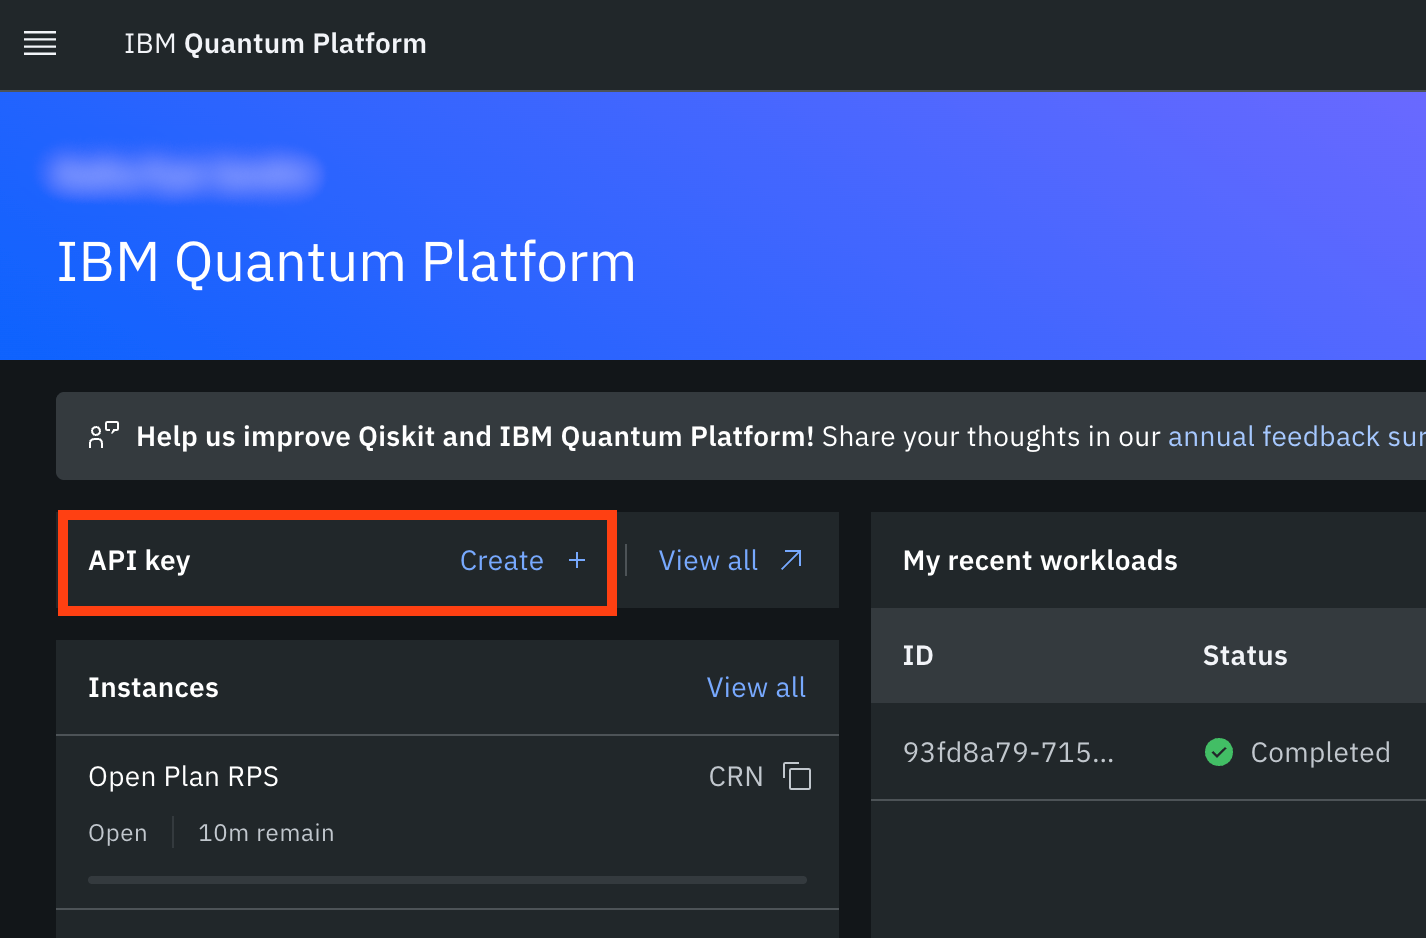

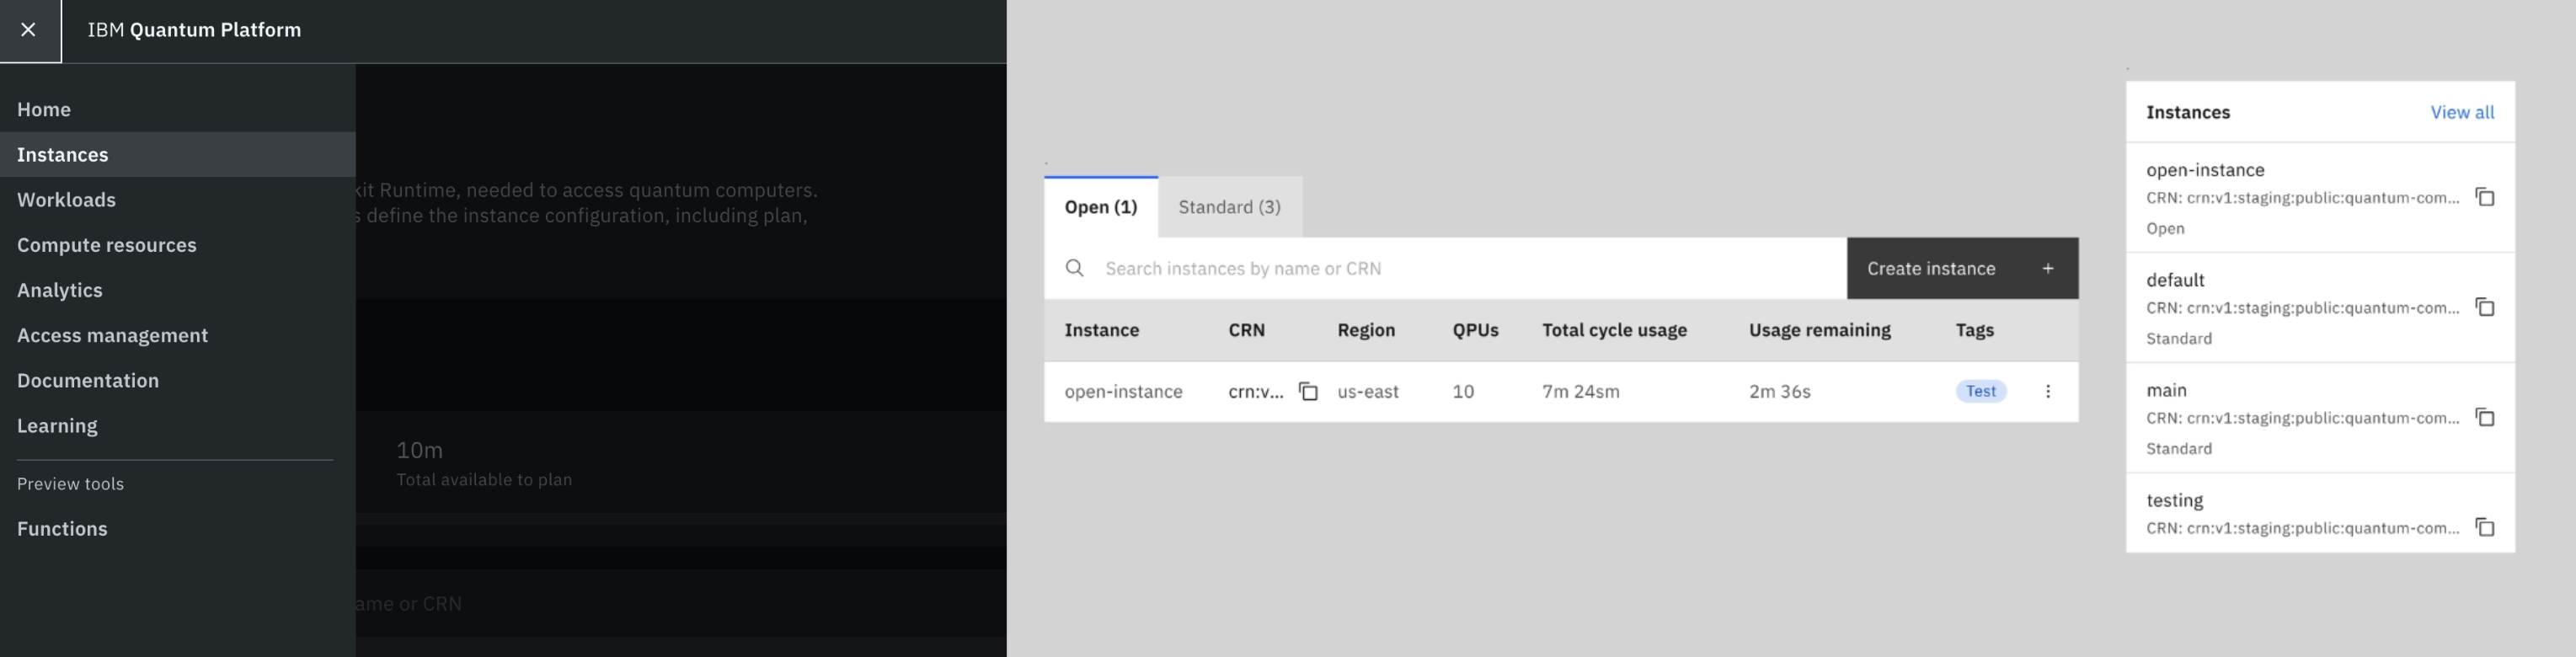

In [ ]:
# Save your API key to have access to the quantum computers

your_api_key = "deleteThisAndPasteYourAPIKeyHere"
your_crn = "deleteThisAndPasteYourCRNHere"

QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=your_api_key,
    instance=your_crn,
    overwrite=True,
)

Now that you have saved your account, we will run a simple example using Qiskit to help you get started with quantum programming and show you how to access IBM Quantum hardware.

# Generate a three-qubit GHZ state using Qiskit patterns <a id="ghz"></a>

Now, we will follow this episode of [Coding with Qiskit](https://www.youtube.com/watch?v=93-zLTppFZw&list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi&index=4) to guide you through the process of generating a three-qubit GHZ state using [Qiskit patterns](https://quantum.cloud.ibm.com/docs/en/guides/intro-to-patterns). 

A Qiskit pattern is a general framework for breaking down domain-specific problems and contextualizing required capabilities in stages. This allows for the seamless composability of new capabilities developed by IBM Quantum researchers (and others) and enables a future in which quantum computing tasks are performed by powerful heterogenous (CPU/GPU/QPU) computing infrastructure. 

The four steps of a Qiskit pattern are as follows:

1. **Map** problem to quantum circuits and operators
2. **Optimize** for target hardware
3. **Execute** on target hardware
4. **Post-process** results



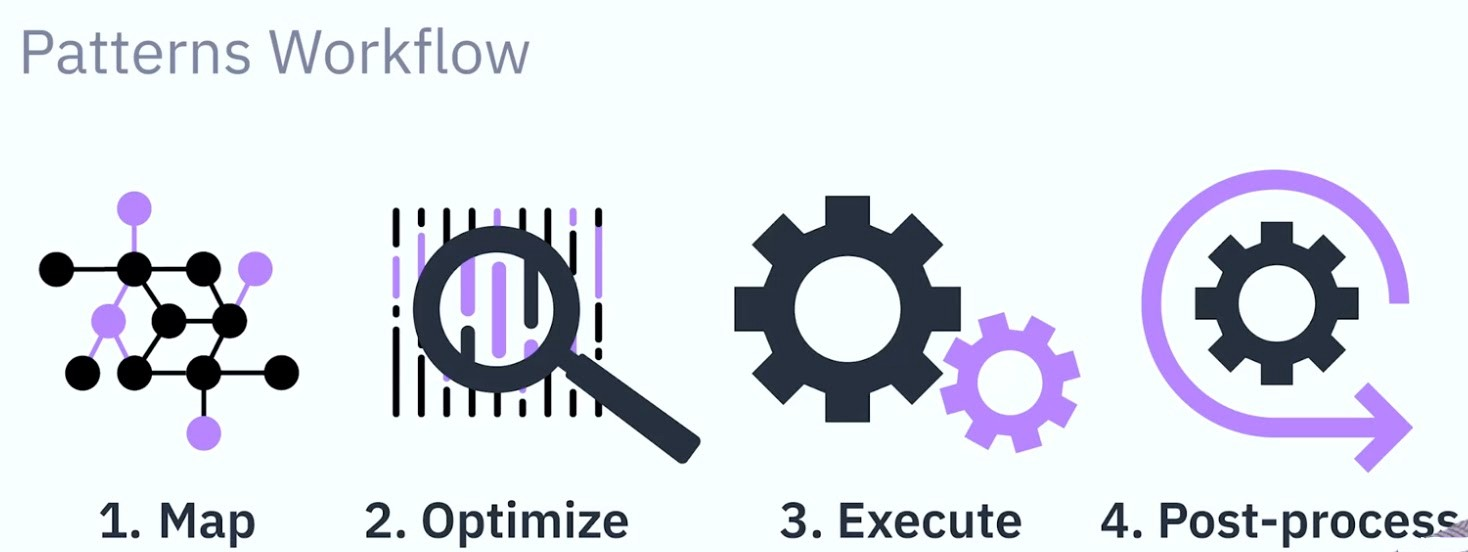


## Step 1. Map <a id="map"></a>

The Greenberger–Horne–Zeilinger (GHZ) state is the extension to three (or more) qubits to the maximally entangled state characteristic of the Bell state. That means that the GHZ state is:

$$
|GHZ\rangle = \frac{|000\rangle+|111\rangle}{\sqrt{2}}.
$$

One of the interesting features of the GHZ state is that there are different and equivalent ways to build it using a quantum circuit. Here we will use a ladder approach:

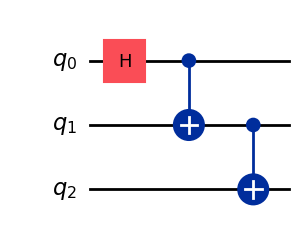

In [130]:
# Create a new circuit with three qubits
qc = QuantumCircuit(3)

# Add a H gate to qubit 0
qc.h(0) 

# Add a CNOT gate to qubits 0 and 1
qc.cx(0, 1)

# Add a CNOT gate to qubits 1 and 2
qc.cx(1, 2)

# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")

The initial state of the quantum circuit is the $\ket{000}$ state.

The final state is ([noting that the Qiskit SDK uses the LSb 0 bit numbering](https://docs.quantum.ibm.com/guides/bit-ordering)):

In [131]:
# Use Statevector to fetch the statevector of the circuit
sv = Statevector(qc)
sv.draw(output='latex')

<IPython.core.display.Latex object>

When creating quantum circuits, you must also consider what type of data you want returned after execution. Qiskit provides two ways to return data: you can obtain the expectation value of an observable, or you can obtain a probability distribution for a set of qubits you choose to measure. Prepare your workload to measure your circuit in one of these two ways with [Qiskit primitives](https://docs.quantum.ibm.com/guides/get-started-with-primitives):

1. **Sampler** samples the output register from the execution of one or more quantum circuits. Its output is counts on per-shot measurements. 
2. **Estimator** computes the expectation value of one or more observables with respect to the states generated by the quantum circuit. Its output consists of the expectation values along with their standard errors.

<div class="alert alert-success">

**Step 1a - Estimator Primitive** Define the observables for which you want to calculate the expectation values

</div>

This example measures expectation values by using the `qiskit.quantum_info` submodule, which is specified by using operators (mathematical objects used to represent an action or process that changes a quantum state). The following code cell creates six three-qubit Pauli operators: `ZZZ`, `ZZX`, `ZII`, `XXI`, `ZZI`, `III`.

We expect to see see non-zero expectation values for `ZZI`, and `III` -- indeed we expect an expectation value of 1 for this particular state for both of these observables. And an expectation value of 0 for `ZZZ`, `ZZX`, `ZII`, `XXI`. 

In [132]:
# Define some observables
observables_labels = ["ZZZ", "ZZX", "ZII", "XXI", "ZZI", "III"]
observables = [SparsePauliOp(label) for label in observables_labels]

<div class="alert alert-success">

**Step 1b - Sampler Primitive** Make a note to add measurement gates to the circuit

The `Sampler` samples the circuit and returns a probability distribution of measurement outcomes. This means we will need to add measurement gates to the circuit.

## Step 2. Optimize <a id="optimize"></a>

When executing circuits on a device, it is important to optimize the set of instructions that the circuit contains and minimize the overall depth (roughly the number of instructions) of the circuit. This ensures that you obtain the best results possible by reducing the effects of error and noise. Additionally, the circuit's instructions must conform to a backend device's [Instruction Set Architecture (ISA)](https://docs.quantum.ibm.com/guides/transpile#instruction-set-architecture) and must consider the device's basis gates and qubit connectivity.



We define a backend, which will correspond to a [noisy simulator](https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/fake-provider).

In [133]:
backend = FakeAlmadenV2() 

<div class="alert alert-success">

**Step 2a - Estimator Primitive** Transpile the circuit into ISA circuit (ISA = Instruction Set Architecture)

</div>

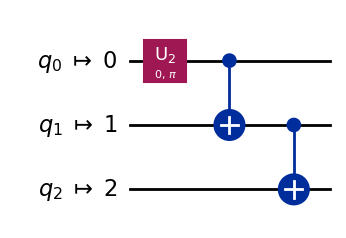

In [134]:
# Convert to an ISA circuit 
# Generate the pass manager, which is a list of transpiler passes grouped into a logical unit
pm_estimator = generate_preset_pass_manager(backend=backend, optimization_level=1) 
# Run the pass manager to create the ISA circuit 
isa_circuit_estimator = pm_estimator.run(qc)
# Draw the circuit, note: idle_wires = False to hide all the qubits not being used
isa_circuit_estimator.draw("mpl", idle_wires=False) 

<div class="alert alert-success">

**Step 2b - Sampler Primitive** Transpile the circuit into ISA circuit (ISA = Instruction Set Architecture)

</div>

But first add measurement gates to the circuit!

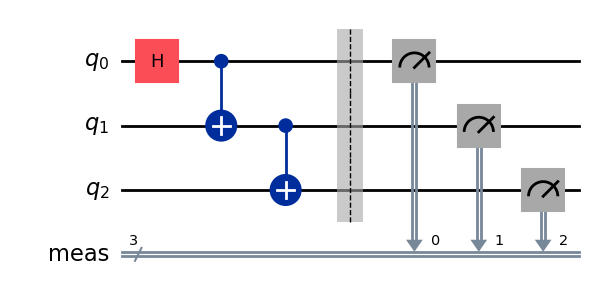

In [135]:
# Use measure_all, which adds a barrier, applies measurement gates on all qubits, creates a classical register called `meas`
qc.measure_all() 
qc.draw('mpl')

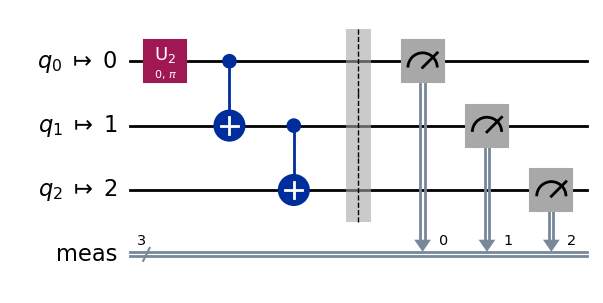

In [136]:
# Convert to an ISA circuit
pm_sampler = generate_preset_pass_manager(backend=backend, optimization_level=1) 
isa_circuit_sampler = pm_sampler.run(qc) 
isa_circuit_sampler.draw("mpl", idle_wires=False) 

## Step 3. Execute <a id="execute"></a>

The next step is exciting, we are going to run the quantum circuit with a quantum simulator using Qiskit Runtime! 

Quantum computers can produce random results, so you usually collect a sample of the outputs by running the circuit many times. You can estimate the value of the observable by using the `Estimator` class. `Sampler` can be used to get data from a quantum computer.  These objects possess a `run()` method that executes the selection of circuits, observables, and parameters (if applicable), using a [primitive unified bloc (PUB).](https://docs.quantum.ibm.com/guides/primitive-input-output#pubs)

<div class="alert alert-success">

**Step 3a - Estimator Primitive** Submit a job using the Estimator primitive.

</div>

In [137]:

# Create layout-mapped observables for the ISA circuit
mapped_observables = [
    observable.apply_layout(isa_circuit_estimator.layout) for observable in observables
]
# Creates an estimator using the selected backend
estimator = Estimator(mode=backend)
job_estimator = estimator.run([(isa_circuit_estimator, mapped_observables)])
# Result of the entire primitive execution. (You submitted one PUB, so this contains one inner result, and some metadata of its own.):
job_estimator_result = job_estimator.result()
# Result from your single PUB, which had six observables, so contains information on all six:
pub_result_estimator = job_estimator.result()


<div class="alert alert-success">

**Step 3b - Sampler Primitive** Submit a job using the Sampler primitive.

</div>

In [138]:
# Create a sampler using the selected backend
sampler = Sampler(mode=backend) 
# Run the sampler primitive on ISA circuit for specified number of shots (1024)
job_sampler = sampler.run([isa_circuit_sampler], shots=1024) 
# Save the result of the job 
result_sampler = job_sampler.result() 

Next is the final step of Qiskit patterns, where we will visualize our results.

## Step 4. Post-process <a id="post-process"></a>

Finally, the last step of Qiskit patterns is to post-process the information we have gathered from the execution of the quantum circuit. You might feed these results into another workflow for further analysis or prepare a plot of the key values and data. In general, this step is specific to your problem.  

- For the `Estimator`, we plot the values of the expecation values of the observables using [`pyplot`](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)
- For the `Sampler`, we plot the probability distribution obtained by sampling the quantum circuit as many times as the shots you specified using `plot_histogram`.

<div class="alert alert-success">

**Step 4a - Estimator Primitive** Visualize the results using `pyplot`

</div>

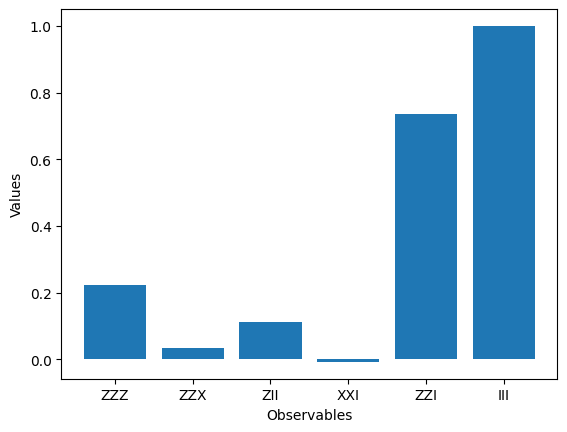

In [139]:
# Plot the result
values = pub_result_estimator[0].data.evs 
# Plot graph
container = plt.bar(observables_labels, values, width=0.8)
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

We see that the observables $ZZI$ and $III$ have an expectation value close to 1, since $ZZI$ introduces two minus signs that cancel out, and $III$ acts as the identity, leaving the GHZ state unchanged. The rest of the observables have an expectation value close to 0, since their $Z$ operators introduce an odd number of minus signs, or the $X$ operators flip a number of qubits that make the overlapping states orthogonal.

<div class="alert alert-success">

**Step 4b - Sampler Primitive** Visualize the results using `plot_histogram`

</div>

We can visualize the counts with a histogram plot and quickly see how the two possible quantum states are measured with a probability close to 50%.

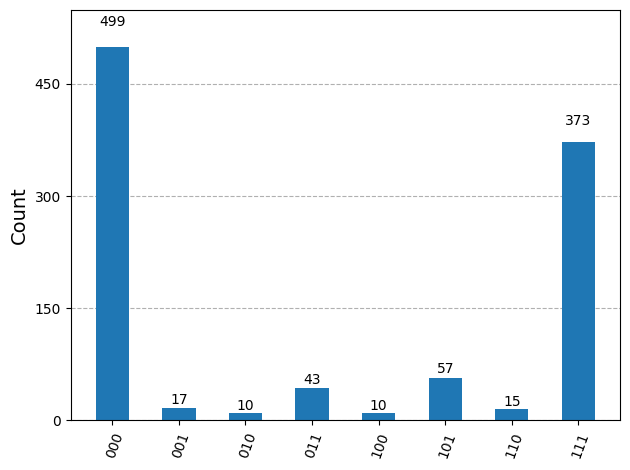

In [140]:
counts = result_sampler[0].data.meas.get_counts() 
# Note: meas is the default name of the classical register when using measure_all(). 
# If you specify a classical register, then use the name you assign

# Plot the result
plot_histogram(counts)

# 2.5 Running GHZ on hardware <a id="bonus"></a>

To execute a quantum circuit on a quantum computer using Qiskit, we first need to define the quantum backend. We will use the IBM Brisbane QPU.

In [141]:
# Get a backend
service = QiskitRuntimeService()
#backend = service.backend("ibm_brisbane")
#backend = service.least_busy(simulator=False, operational=True) #option to use the backend with the shortest queue.
backend = service.backend("ibm_pinguino2")
print(f"We are using the {backend.name} quantum computer")

We are using the ibm_pinguino2 quantum computer


The next call illustrates how easy it is to execute quantum circuits on hardware with `QiskitRuntimeService`. Once we have selected the backend in the cell above, we can simply copy and paste the same lines of code that we wrote for the Sampler simulator, including post-processing and visualization.

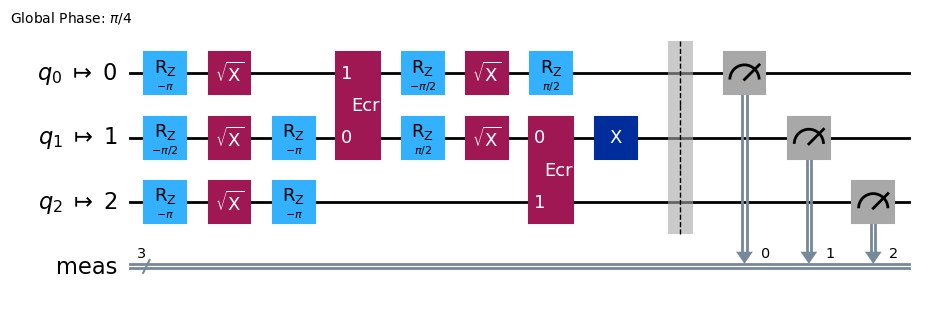

In [150]:
# Step 1. Map
# You should have created a GHZ circuit above and assigned with variable `qc`

# Step 2. Optimize
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit_sampler = pm.run(qc) 
isa_circuit_sampler.draw("mpl", idle_wires=False) 

<div class="alert alert-block alert-warning">
<b>Warning: Queue time and 10 minute limit</b>

This will roughly take 10s of calculation time on the real hardware, however, running this on the real hardware can lead to long queue times and will take a while, 
and will block the jupyter notebook in the meantime. 

Please note that the open plan only includes 10 minutes time on the real hardware, and since we will need these minutes in the later labs, please make sure to save most of your time for these labs. 

</div>

In [146]:
# Step 3. Execute
sampler = Sampler(mode=backend)
job = sampler.run(isa_circuit_sampler, shots=10000)

Outcomes : {'111': 4521, '000': 4608, '110': 277, '011': 118, '100': 115, '001': 250, '101': 91, '010': 20}


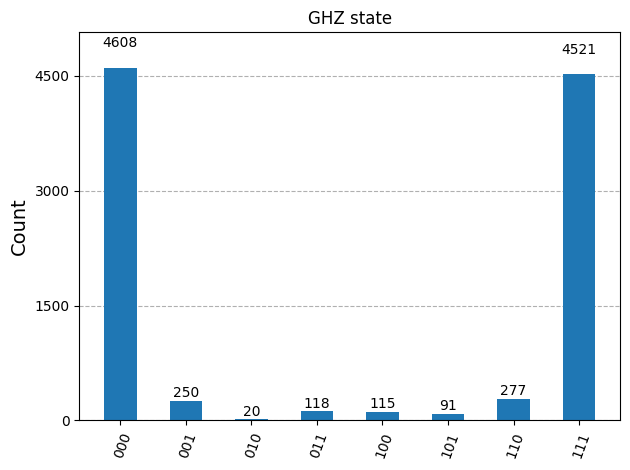

In [147]:
# Step 4. Post-process
results = job.result()
counts_list = results[0].data.meas.get_counts()

print(f"Outcomes : {counts_list}")
plot_histogram(counts_list, title="GHZ state")

You can view your job id and backend information by running the following cell:

In [148]:
print(job.job_id)
print(
    f"Name: {backend.name}\n"
    f"Version: {backend.version}\n"
    f"No. of qubits: {backend.num_qubits}\n"
    f"Native gate set: {backend.operation_names}\n"
)

<bound method BasePrimitiveJob.job_id of <RuntimeJobV2('d3tp9vsv6o9s73ct5h4g', 'sampler')>>
Name: ibm_pinguino2
Version: 2
No. of qubits: 127
Native gate set: ['rz', 'delay', 'x', 'sx', 'id', 'ecr', 'reset', 'if_else', 'measure']



In [149]:
job_id = job.job_id()
print(f"Job ID: {job_id}")

qpu_time = job.usage()

print("QPU execution time (seconds):", qpu_time)

Job ID: d3tp9vsv6o9s73ct5h4g
QPU execution time (seconds): 4


### Fetching results from a completed job

The cell below demonstrates how you can fetch results from a completed job. Here are the details for this job example:

- Backend Name: ibm_pinguino2
- No. of qubits: 127
- Native gate set: ['sx', 'delay', 'measure', 'x', 'id', 'rz', 'reset', 'ecr']
- Job_id: d3mko2r4kkus739droa0

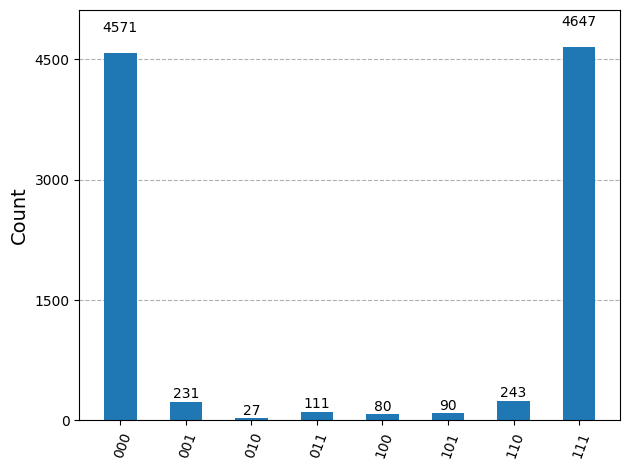

In [121]:
retrieved_job = service.job('d3mko2r4kkus739droa0')
result = retrieved_job.result()
counts = result[0].data.meas.get_counts() 
plot_histogram(counts)

Awesome! 

You have managed to run a circuit on a real quantum computer, and the results are very good! The most repeated states are $|000\rangle$ and $|111\rangle$, and each of them accumulate a probability just below 50%. In this case we observe that, due to noise from the quantum computer, some quantum states are measured, even if the theoretical probability of measuring is 0.

# Congratulations! <a id="congratulations"></a>

Congratulations on making it to the end of Pre-req notebook!

You learned how to follow the workflow of Qiskit patterns to set up, optimize, run, and process your circuit. You successfully created a GHZ state, and executed on a simulator and on quantum hardware, and observed how the measurements of the Sampler are in good agreement with the theoretical probabilities of measuring the states $|000\rangle$ and $|111\rangle$ with 50% probability.

With the basics down, you’re now ready to begin thinking like a quantum developer. It’s a little different than thinking like a quantum physicist, though. We’re not just making discoveries about how the world works—we’re trying to use quantum mechanics as a tool to solve meaningful problems and enact positive change in the world.

We like to say we’ve entered the era of quantum utility—for the first time, quantum computers can do things beyond the abilities of brute-force classical computing. Now, we’re looking for quantum advantage, where quantum computers are the best way to solve the problem. We need you, the quantum community for that—we need to uncover and implement quantum algorithms and apply them to real-world use cases. The rest of the notebook will be devoted to that—getting you to start thinking like a quantum developer.

And of course, solving problems with real-world impact means thinking about who you’re impacting and how. At IBM we hold that we must research and develop technology responsibly. To that end, quantum computing and ethics experts at IBM have been researching the societal implications of quantum computing, and our role as a quantum computing provider in mitigating potentially undesired consequences of the technology. We encourage you to learn more by reading about our Responsible Quantum Computing effort.


Reference(s): IBM Quantum Summer School 2025 and Qiskit Documentation

Thanks to Voica Radescu, Cristina Sanz, Joana Fraxnet, Junye Huang, Brian Ingmanson, Radha Pyari Sandhir and Jorge Martinez de Lejarza